In [1]:
#@title $(Ejecutar)$ Preprocesamiento
#@markdown [Kaggle_traffic-accidents](https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents/data)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


#@markdown # Procesamiento del dataset
df0 = pd.read_csv('https://drive.google.com/uc?id=1ZeiNMmjUTucHLJl0hFI-TbLUX5zpwMsU',encoding='latin-1')
# Que clases se van a usar en el dataframe
clases = [
          'num_units',
          'injuries_total',
          'injuries_fatal',
          'injuries_incapacitating',
          'injuries_non_incapacitating',
          'injuries_reported_not_evident',
          'injuries_no_indication',
          'crash_hour',
          'crash_day_of_week',
          'crash_month',
          'traffic_control_device',
          'weather_condition',
          'lighting_condition',
          'first_crash_type',
          'trafficway_type',
          'alignment',
          'roadway_surface_cond',
          'road_defect',
          'crash_type',
          'intersection_related_i',
          'damage',
          'prim_contributory_cause',
          'most_severe_injury'
        ]


#@markdown ## Seleccion y conversion de datos

#@markdown 1. Seleccionamos datos representativos (Excluye crash_date como objeto por ser redundante)
df = df0[clases]

#@markdown 2. Reescribimos a formato numerico los datos. (por ejemplo crash_type)
mapeo_clases = {
    'traffic_control_device':{'TRAFFIC SIGNAL':0,'STOP SIGN/FLASHER':1,'NO CONTROLS':2,'UNKNOWN':3,'OTHER':4,'YIELD':5,'PEDESTRIAN CROSSING SIGN':6,'OTHER REG. SIGN':7,'LANE USE MARKING':8,'FLASHING CONTROL SIGNAL':9,'POLICE/FLAGMAN':10,'OTHER WARNING SIGN':11,'RAILROAD CROSSING GATE':12,'SCHOOL ZONE':13,'OTHER RAILROAD CROSSING':14,'RR CROSSING SIGN':15,'DELINEATORS':16,'NO PASSING':17,'BICYCLE CROSSING SIGN':19},
    'weather_condition':{'CLEAR':0,'RAIN':1,'CLOUDY/OVERCAST':2,'SNOW':3,'UNKNOWN':4,'OTHER':5,'FREEZING RAIN/DRIZZLE':6,'FOG/SMOKE/HAZE':7,'SLEET/HAIL':8,'BLOWING SNOW':9,'SEVERE CROSS WIND GATE':10,'BLOWING SAND, SOIL, DIRT':11,},
    'lighting_condition':{'DAYLIGHT':0,'DARKNESS, LIGHTED ROAD':1,'DARKNESS':2,'DUSK':3,'UNKNOWN':4,'DAWN':5},
    'first_crash_type':{'TURNING':0,'ANGLE':1,'REAR END':2,'SIDESWIPE SAME DIRECTION':3,'PEDESTRIAN':4,'PEDALCYCLIST':5,'PARKED MOTOR VEHICLE':6,'FIXED OBJECT':7,'SIDESWIPE OPPOSITE DIRECTION':8,'HEAD ON':9,'REAR TO FRONT':10,'REAR TO SIDE':11,'OTHER OBJECT':12,'OTHER NONCOLLISION':13,'OVERTURNED':14,'ANIMAL':15,'REAR TO REAR':16,'TRAIN':17},
    'trafficway_type':{'NOT DIVIDED':0,'FOUR WAY':1,'DIVIDED - W/MEDIAN (NOT RAISED)':2,'ONE-WAY':3,'DIVIDED - W/MEDIAN BARRIER':4,'T-INTERSECTION':5,'OTHER':6,'CENTER TURN LANE':7,'UNKNOWN INTERSECTION TYPE':8,'FIVE POINT, OR MORE':9,'UNKNOWN':10,'Y-INTERSECTION':11,'TRAFFIC ROUTE':12,'ALLEY':13,'NOT REPORTED':14,'PARKING LOT':15,'RAMP':16,'ROUNDABOUT':17,'DRIVEWAY':18,'L-INTERSECTION':19},
    'alignment':{'STRAIGHT AND LEVEL':0,'STRAIGHT ON GRADE':1,'CURVE, LEVEL':2,'STRAIGHT ON HILLCREST':3,'CURVE ON GRADE':4,'CURVE ON HILLCREST':5},
    'roadway_surface_cond':{'DRY':0,'WET':1,'UNKNOWN':2,'SNOW OR SLUSH':3,'ICE':4,'OTHER':5,'SAND, MUD, DIRT':6},
    'road_defect':{'NO DEFECTS':0,'UNKNOWN':1,'WORN SURFACE':2,'OTHER':3,'RUT, HOLES':4,'SHOULDER DEFECT':5,'DEBRIS ON ROADWAY':6},
    'crash_type':{'NO INJURY / DRIVE AWAY': 0, 'INJURY AND / OR TOW DUE TO CRASH': 1}, # Crash type mapeo[8]
    'intersection_related_i':{'Y':0,'N':1},
    'damage':{'OVER $1,500':0,'$501 - $1,500':1,'$500 OR LESS':2},
    'prim_contributory_cause':{'UNABLE TO DETERMINE':0,'FAILING TO YIELD RIGHT-OF-WAY':1,'FOLLOWING TOO CLOSELY':2,'DISREGARDING TRAFFIC SIGNALS':3,'IMPROPER TURNING/NO SIGNAL':4,'FAILING TO REDUCE SPEED TO AVOID CRASH':5,'IMPROPER OVERTAKING/PASSING':6,'DISREGARDING STOP SIGN':7,'IMPROPER LANE USAGE':8,'NOT APPLICABLE':9,'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':10,'WEATHER':11,'IMPROPER BACKING':12,'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':13,'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':14,'DISTRACTION - FROM INSIDE VEHICLE':15,'DRIVING ON WRONG SIDE/WRONG WAY':16,'DISREGARDING OTHER TRAFFIC SIGNS':17,'EQUIPMENT - VEHICLE CONDITION':18,'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':19,'PHYSICAL CONDITION OF DRIVER':20,'DISTRACTION - FROM OUTSIDE VEHICLE':21,'EXCEEDING SAFE SPEED FOR CONDITIONS':22,'TURNING RIGHT ON RED':23,'EXCEEDING AUTHORIZED SPEED LIMIT':24,'DISREGARDING ROAD MARKINGS':25,'ROAD CONSTRUCTION/MAINTENANCE':26,'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':27,'CELL PHONE USE OTHER THAN TEXTING':28,'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':29,'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':30,'DISREGARDING YIELD SIGN':31,'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':32,'RELATED TO BUS STOP':33,'TEXTING':34,'ANIMAL':35,'OBSTRUCTED CROSSWALKS':36,'BICYCLE ADVANCING LEGALLY ON RED LIGHT':37,'PASSING STOPPED SCHOOL BUS':38,'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':39},
    'most_severe_injury':{'NO INDICATION OF INJURY':0,'NONINCAPACITATING INJURY':1,'REPORTED, NOT EVIDENT':2,'INCAPACITATING INJURY':3,'FATAL':4}
}

# replace

df[clases] = df[clases].replace(mapeo_clases)

#@markdown # Que clase representa nuestra etiqueta $y$
#@markdown El mismo dataset nos muestra una variable que podria representar claramente un nivel de emergencia (most severe injuries) naturalmente organizadas de mayor a menor en cantidad de incidentes siendo 0 la clase con el incidente mas comun y 5 el mas raro o grave.
#display(df.corr().abs().sum().sort_values(ascending=True)-1)
#@markdown # valores de la clase
clase = "most_severe_injury" # @param ["injuries_total","most_severe_injury","crash_type","injuries_non_incapacitating"]
display(df0[[clase]].value_counts())
display(df[[clase]].value_counts())
#df[[clase]].plot(kind='hist' , title=clase)

#@markdown ## Valores de la clase most_injury
#@markdown 0. ) NO INDICATION OF INJURY 154789
#@markdown 1. ) NONINCAPACITATING INJURY    31527
#@markdown 2. ) REPORTED, NOT EVIDENT   16075
#@markdown 3. ) INCAPACITATING INJURY   6564
#@markdown 4. ) FATAL   351

#@markdown # Carga de train y test
X = df.values[:,:-1].astype(np.float64) # X = Caracteristicas
y = df.values[:,-1].astype(int) # y = clase o etiquetas
test_size = 0.6 # @param {type:"slider", min:0.1, max:0.9, step:0.1}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

#@markdown * Escalado de datos

estandarizar = True # @param {type:"boolean"}
if estandarizar:
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
else:
  None











from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicción")
  plt.ylabel("Valor real")
  plt.title(title)
  plt.show()

<ipython-input-1-3d6e99d93da7>:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[clases] = df[clases].replace(mapeo_clases)
<ipython-input-1-3d6e99d93da7>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[clases] = df[clases].replace(mapeo_clases)


,count
most_severe_injury,
NO INDICATION OF INJURY,154789
NONINCAPACITATING INJURY,31527
"REPORTED, NOT EVIDENT",16075
INCAPACITATING INJURY,6564
FATAL,351


,count
most_severe_injury,
0,154789
1,31527
2,16075
3,6564
4,351


# Clasificacion Supervised
Modelos supervisados
* GaussianNB
* Random Forest Clasifier
* SVC
* DNN

In [2]:
#@title GaussianNB
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_gau = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_gau))
print("Recall: ", recall_score(y_test, y_pred_gau,average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_gau, average='weighted'))

Accuracy:  0.9971652439801248
Recall:  0.9971652439801248
F1-score:  0.9974809548567114


In [3]:
#@title Random Forest Clasifier
from sklearn.ensemble import RandomForestClassifier

max_depth = 2 # @param {type:"slider", min:1, max:10, step:1}
random_state = 21

rfc = RandomForestClassifier(max_depth=max_depth, random_state=random_state)
y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))
print("Recall: ", recall_score(y_test, y_pred_rfc,average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_rfc, average='weighted'))

Accuracy:  0.9363692827111734
Recall:  0.9363692827111734
F1-score:  0.9171312398955174


In [4]:
#@title SVC
from sklearn.svm import SVC

kernel = 'linear' # @param ["linear", "poly", "rbf", "sigmoid"]
degree = 3 # @param {type:"slider", min:1, max:10, step:1}
gamma = 'scale' # @param ["scale", "auto"]
random_state = 21

svc = SVC(kernel=kernel, degree=degree, gamma=gamma, random_state=random_state)
y_pred_svc = svc.fit(X_train, y_train).predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_svc))
print("Recall: ", recall_score(y_test, y_pred_svc,average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_svc, average='weighted'))

Accuracy:  1.0
Recall:  1.0
F1-score:  1.0


In [5]:
#@title DNN
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(21)
tf.keras.utils.set_random_seed(21)

input_shape = X_train.shape[1]
output_shape = len(np.unique(y_train))
epochs = 3 # @param {"type":"slider","min":3,"max":20,"step":1}
batch_size = 231 # @param {"type":"slider","min":2,"max":1000,"step":3}

model = keras.Sequential([
    keras.layers.Input(shape=(input_shape,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(output_shape, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(X_test)
y_pred_dnn = np.argmax(y_pred, axis=1) # Ahorra el .evaluate :v
print("Accuracy: ", accuracy_score(y_test, y_pred_dnn))
print("Recall: ", recall_score(y_test, y_pred_dnn,average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred_dnn, average='weighted'))

Epoch 1/3
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8844 - loss: 0.3818
Epoch 2/3
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 0.0028
Epoch 3/3
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 9.1710e-04
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Accuracy:  0.9999442604153396
Recall:  0.9999442604153396
F1-score:  0.9999441086674379


# Unsupervised
¿Que clase de separaciones (cluster) podemos encontrar?

* Kmeans
* DBS

como herramientas para observar el comportamiento de nuestros datos


In [12]:
#@title PCA ($Ejecutar$)
# Si no se hace la ram se va de paseo :v hay 200k registros y 22 clases
from sklearn.decomposition import PCA

n_components = 2 # @param {type:"slider", min:1, max:10, step:1}

pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X)

selection_size = 0.2 # @param {type:"slider", min:0.1, max:0.9, step:0.1}
X_pca, X_not_used, y_label,y_not_used = train_test_split(X_pca, y, test_size=(1-selection_size), random_state=21)





(3, 2)
(209306,)
eje x:num_units
eje y:injuries_total


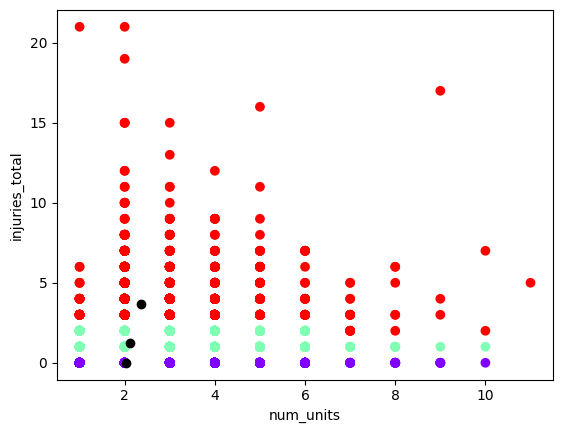

In [13]:
#@title Kmeans
from sklearn.cluster import KMeans

n_clusters = 3 # @param {type:"slider", min:1, max:10, step:1}
random_state = 21
eje_x = 0
eje_y = 1


kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X[:,[eje_x,eje_y]])

plt.scatter(X[:,eje_x],X[:,eje_y], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel(df.columns[eje_x])
plt.ylabel(df.columns[eje_y])
print(kmeans.cluster_centers_.shape)
print(kmeans.labels_.shape)

print("eje x:"+df.columns[eje_x])
print("eje y:"+df.columns[eje_y])

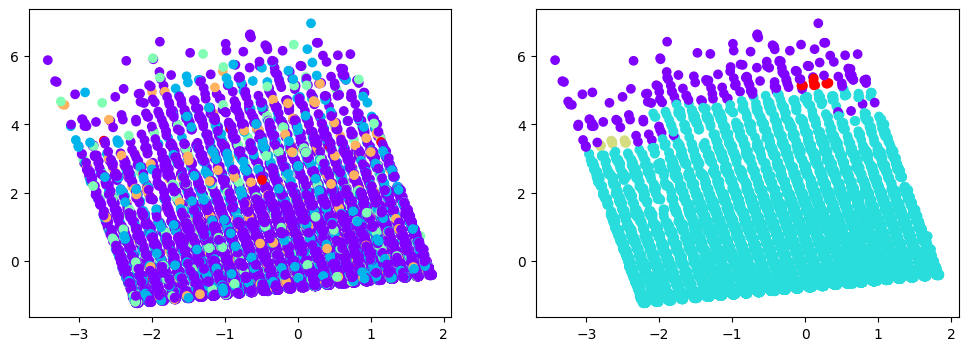

In [15]:
#@title DBSCAN PCA
from sklearn.cluster import DBSCAN

eps = 0.2 # @param {type:"slider", min:0.1, max:1, step:0.1}
min_samples = 10 # @param {type:"slider", min:1, max:10, step:1}
eje_x = 0
eje_y = 1

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_pca)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,eje_x], X_pca[:,eje_y], c=y_label, cmap='rainbow');
plt.subplot(1,2,2)
plt.scatter(X_pca[:,eje_x],X_pca[:,eje_y], c=dbscan.labels_, cmap='rainbow');

# Matriz de confusion
* Es muy util cuando hay desbalance de clases
* Contempla otras metricas como el recall y el accuracy

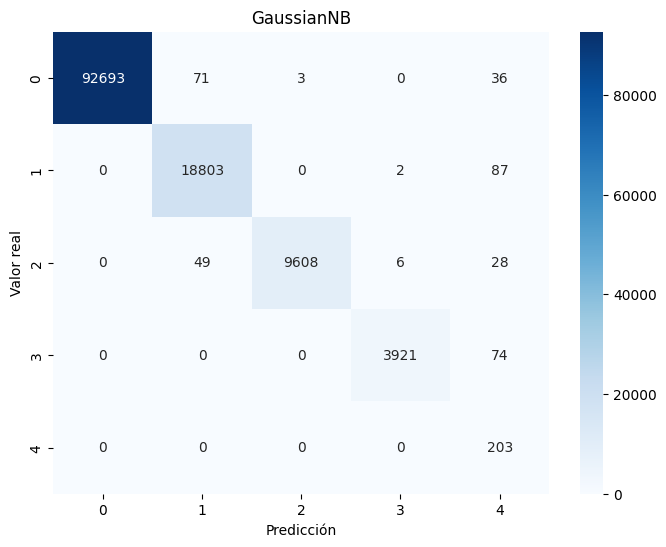

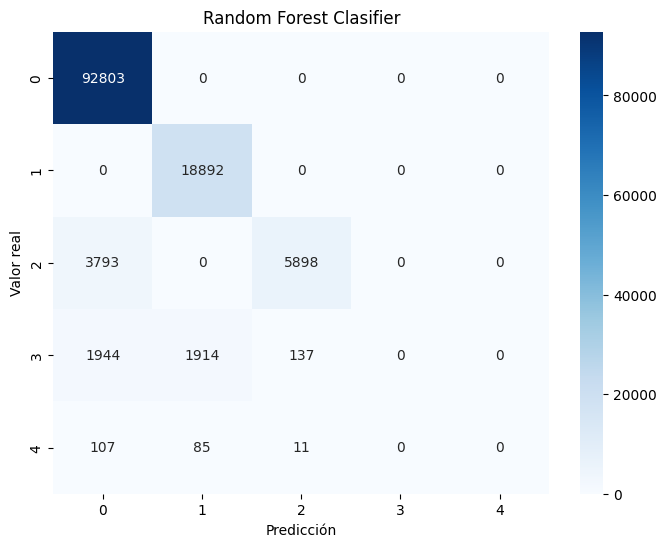

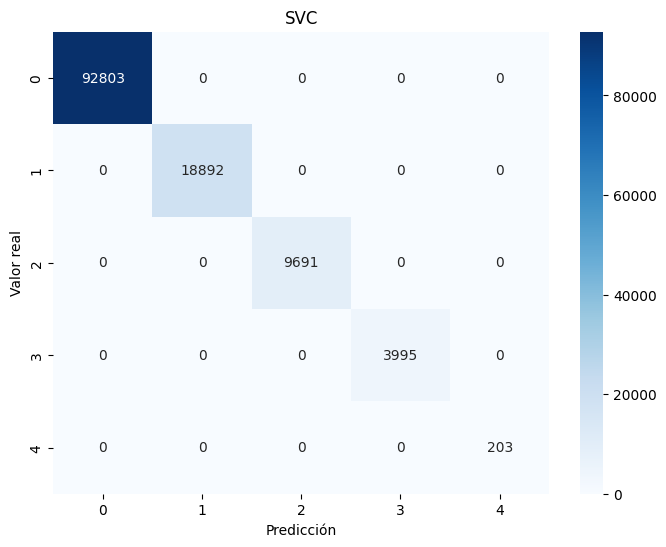

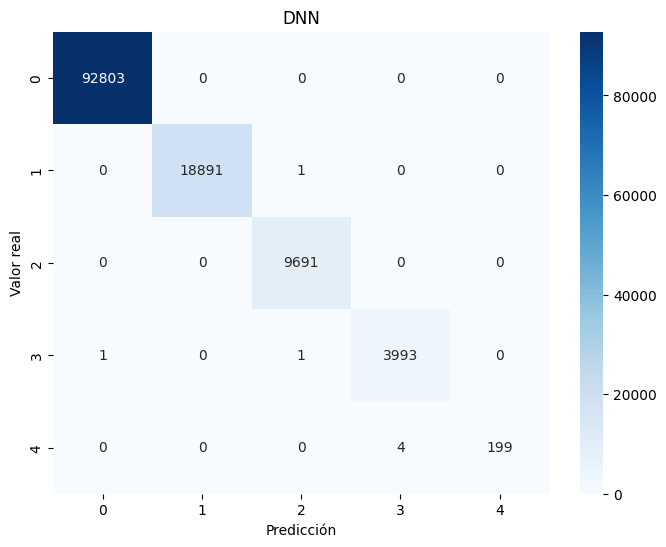

In [16]:
#@title Plots

Y = [y_pred_gau, y_pred_rfc, y_pred_svc, y_pred_dnn]
titles = ["GaussianNB", "Random Forest Clasifier", "SVC", "DNN"]

for i in range(4):
  #plt.subplot(2,2,i+1)
  plot_confusion_matrix(y_test=y_test, y_pred=Y[i], title=titles[i])